In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, 'C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel')
from image_processor import split_module_to_cells
import time

%matplotlib qt

# Load image

In [2]:
import os, random
image_dir = random.choice(os.listdir("module_images"))
img = cv2.imread(f"module_images/{image_dir}")
plt.imshow(img)

# Process image

In [3]:
model_path_cells = (
    "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_backbone_512.hdf5"
)
model_path_module = (
    "C:/Users/chuck/OneDrive/Desktop/Honors/models/resnet_PV_module_256.hdf5"
)
folders = [
    "C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060",
    "C:/Users/chuck/OneDrive/Desktop/Honors/BT1/BT1",
]
toml_path = "C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel/configs/camera_config.toml"

image, pannel_images, coords = split_module_to_cells(
        model_path_module=model_path_module,
        model_path_cells=model_path_cells,
        image=img,
        toml_path=toml_path,
        show=False,
        both=True
    )


model loading 2.9915931224823
barrel distort 0.0380251407623291
1/1 [==============================] - 1s 786ms/step
module crop 0.922858476638794
1/1 [==============================] - 0s 367ms/step
module mask 11.32560920715332
houglines 0.06240367889404297
(4008, 2104)
(4007, 2104)


In [4]:
image_cp = np.copy(image)
image_cp = cv2.merge((image_cp, image_cp, image_cp))
# coords.reverse()
# print(coords)
for square in coords:
    print(square)
    polygon = np.array(square, dtype=np.int32)

    # Draw the polygon on the image
    cv2.polylines(image_cp, [polygon], isClosed=True, color=(0, 0, 255), thickness=5)

[[1710. 3636.]
 [1712. 3938.]
 [2026. 3936.]
 [2024. 3634.]]
[[1390. 3636.]
 [1392. 3938.]
 [1706. 3936.]
 [1704. 3634.]]
[[1070. 3636.]
 [1072. 3938.]
 [1386. 3936.]
 [1384. 3634.]]
[[ 734. 3636.]
 [ 736. 3938.]
 [1066. 3936.]
 [1064. 3634.]]
[[ 414. 3636.]
 [ 416. 3938.]
 [ 730. 3936.]
 [ 728. 3634.]]
[[  94. 3636.]
 [  96. 3938.]
 [ 410. 3936.]
 [ 408. 3634.]]
[[1710. 3316.]
 [1712. 3626.]
 [2026. 3624.]
 [2024. 3314.]]
[[1390. 3316.]
 [1392. 3626.]
 [1706. 3624.]
 [1704. 3314.]]
[[1070. 3316.]
 [1072. 3626.]
 [1386. 3624.]
 [1384. 3314.]]
[[ 734. 3316.]
 [ 736. 3626.]
 [1066. 3624.]
 [1064. 3314.]]
[[ 414. 3316.]
 [ 416. 3626.]
 [ 730. 3624.]
 [ 728. 3314.]]
[[  94. 3316.]
 [  96. 3626.]
 [ 410. 3624.]
 [ 408. 3314.]]
[[1712. 2986.]
 [1710. 3304.]
 [2024. 3306.]
 [2026. 2988.]]
[[1392. 2986.]
 [1390. 3304.]
 [1704. 3306.]
 [1706. 2988.]]
[[1072. 2986.]
 [1070. 3304.]
 [1384. 3306.]
 [1386. 2988.]]
[[ 734. 2988.]
 [ 736. 3306.]
 [1066. 3304.]
 [1064. 2986.]]
[[ 416. 2986.]
 [ 414. 3

In [5]:
plt.imshow(image_cp)
plt.show()
plt.imshow(pannel_images[0])

True

In [36]:
import tensorflow as tf
# good_model_path = "C:/Users/chuck/OneDrive/Desktop/Honors/models/Cell_classification/All_in_one/fine_tuned_model"
good_model_path = "C:/Users/chuck/OneDrive/Desktop/Honors/models/Cell_classification/One_hot/class_weight_balanced/good_weights"
model = tf.keras.models.load_model(good_model_path)

TypeError: __init__() takes from 2 to 4 positional arguments but 5 were given

[[1710. 3636.]
 [1712. 3938.]
 [2026. 3936.]
 [2024. 3634.]]


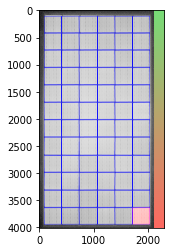

In [35]:
from image_processor import reproject_image
from image_processor import fill_poly_with_color

%matplotlib inline


def colour_bar(h, w, start_colour, end_colour):

    # Create an empty image with the specified dimensions
    image = np.zeros((h, w, 3), dtype=np.uint8)

    # Generate the gradient by interpolating between start_color and end_color
    for y in range(h):
        for x in range(w):
            # Calculate the interpolation factor based on the y-coordinate
            interpolation_factor = y / (h - 1)
            
            # Interpolate between start_color and end_color
            interpolated_colour = (
                int((1 - interpolation_factor) * start_colour[0] + interpolation_factor * end_colour[0]),
                int((1 - interpolation_factor) * start_colour[1] + interpolation_factor * end_colour[1]),
                int((1 - interpolation_factor) * start_colour[2] + interpolation_factor * end_colour[2])
            )
            
            # Set the pixel color in the image
            image[y, x, :] = interpolated_colour
    
    return image

print(coords[0])

image_cp = fill_poly_with_color(image_cp, coords[0], (255,0,0), 0.5)
h,w,c = np.shape(image_cp)

bar = colour_bar(h, 200, (119, 221, 119), (255, 105, 97))

img = np.concatenate((image_cp, bar), axis=1)

plt.imshow(img)
plt.show()

# Make PDF

In [7]:
from fpdf import FPDF

title = 'EL image report'


class PDF(FPDF):
    def header(self):
        # font
        self.set_font('Helvetica', 'B', 18)
        # Calculate width of title and position
        title_w = self.get_string_width(title) + 6
        doc_w = self.w
        self.set_x((doc_w - title_w) / 2)
        # Thickness of frame (border)
        self.set_line_width(1)
        # Title
        self.cell(title_w, 10, title, ln=1, align='C')
        # Line break
        self.ln(10)

    # Page footer
    def footer(self):
        # Set position of the footer
        self.set_y(-15)
        # set font
        self.set_font('helvetica', 'I', 8)
        # Set font color grey
        self.set_text_color(169,169,169)
        # Page number
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

    # Adding chapter title to start of each chapter
    def chapter_title(self, ch_num, ch_title, link):
        # Set link location
        self.set_link(link)
        # set font
        self.set_font('Helvetica', '', 16)
        # background color
        chapter_title = f'Chapter {ch_num} : {ch_title}'
        self.cell(0, 5, chapter_title, ln=1)
        # line break
        self.ln()

    # Chapter content
    def chapter_body(self, name):
        # read text file
        with open(name, 'rb') as fh:
            txt = fh.read().decode('latin-1')
        # set font
        self.set_font('times', '', 12)
        # insert text
        self.multi_cell(0, 5, txt)
        # line break
        self.ln()
        # end each chapter
        self.set_font('times', 'I', 12)
        self.cell(0, 5, 'END OF CHAPTER')

    def print_chapter(self, ch_num, ch_title, name, link):
        self.add_page()
        self.chapter_title(ch_num, ch_title, link)
        self.chapter_body(name)

# Create a PDF object
pdf = PDF('P', 'mm', 'Letter')

# metadata
pdf.set_title(title)
pdf.set_author('UTAS - CSIRO')


# Set auto page break
pdf.set_auto_page_break(auto = True, margin = 15)

# Add Page
pdf.add_page()
pdf.image('report_images/CSIRO_Logo.png', x = 5, y = 5, w=20, h=20)
pdf.image('report_images/Utas_Logo.png', x = pdf.w-5-25, y = 5, h=20)

img_shape = cv2.imread('report_images/module_image.png', 0).shape
img_aspect_ratio = img_shape[1]/img_shape[0]
image_height = pdf.h-50
image_width = (image_height)*img_aspect_ratio
print(img_aspect_ratio)
pdf.image('report_images/module_image.png', x=pdf.w//2-image_width//2, y = 30, h = image_height)

pdf.output('pdf_4.pdf')

0.5250811080608935


''

In [8]:
import cv2
img = cv2.imread("report_images/CSIRO_Logo_raw.png", -1)
res = cv2.resize(img, (0,0), fx=0.2, fy=0.2, interpolation = cv2.INTER_AREA)
cv2.imwrite("report_images/CSIRO_Logo.png", res)

True